In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Reading and Understanding the Data

In [2]:
country_data= pd.read_csv("./Country-data.csv")

### Inspecting the data

In [3]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
country_data.shape

(167, 10)

In [6]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
country_data.drop_duplicates()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


### Checking for Outliers

In [9]:
# Checking for outliers in the continuous variables
country_data.describe(percentiles=[0.05,.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

### Outlier Treatment

In [11]:
country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


In [12]:
outlier_child_mort=country_data.child_mort.quantile(0.95)
outlier_exports=country_data.exports.quantile(0.95)
outlier_health=country_data.health.quantile(0.95)
outlier_imports=country_data.imports.quantile(0.95)
outlier_income=country_data.income.quantile(0.95)
outlier_inflation=country_data.inflation.quantile(0.95)
outlier_life_expec=country_data.life_expec.quantile(0.95)
outlier_total_fer=country_data.total_fer.quantile(0.95)
outlier_gdpp=country_data.gdpp.quantile(0.95)

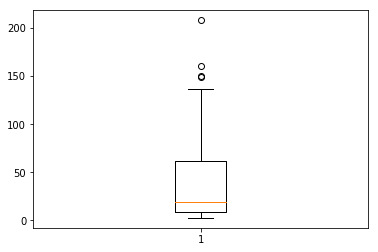

In [13]:
plt.boxplot(country_data.child_mort)
country_data=country_data[country_data.child_mort<=outlier_child_mort]

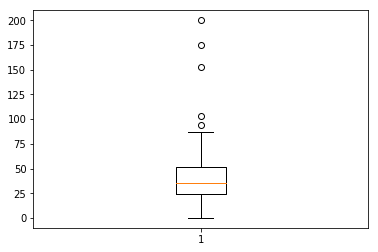

In [14]:
plt.boxplot(country_data.exports)
country_data=country_data[country_data.exports<=outlier_exports]

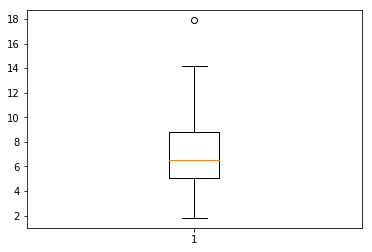

In [15]:
plt.boxplot(country_data.health)
country_data=country_data[country_data.health<=outlier_health]

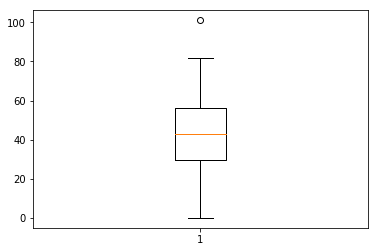

In [16]:
plt.boxplot(country_data.imports)
country_data=country_data[country_data.imports<=outlier_imports]

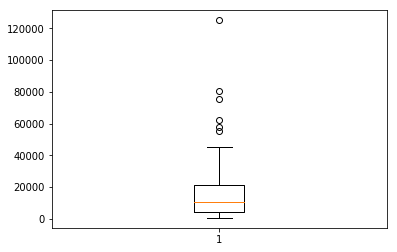

In [17]:
plt.boxplot(country_data.income)
country_data=country_data[country_data.income<=outlier_income]

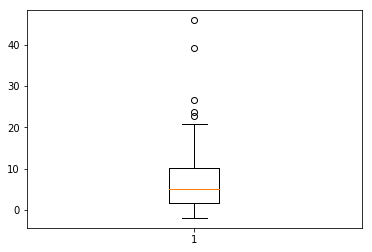

In [18]:
plt.boxplot(country_data.inflation)
country_data=country_data[country_data.inflation<=outlier_inflation]

{'whiskers': [<matplotlib.lines.Line2D at 0x25e096e4dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x25e096ed4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e096e49e8>],
 'medians': [<matplotlib.lines.Line2D at 0x25e096edb38>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e096ede80>],
 'means': []}

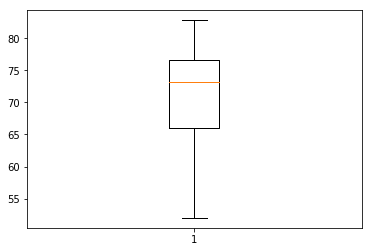

In [19]:
plt.boxplot(country_data.life_expec)

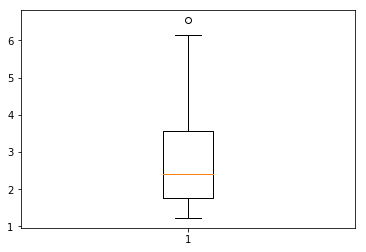

In [20]:
plt.boxplot(country_data.total_fer)
country_data=country_data[country_data.total_fer<=outlier_total_fer]

{'whiskers': [<matplotlib.lines.Line2D at 0x25e097968d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25e09796f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e097964e0>],
 'medians': [<matplotlib.lines.Line2D at 0x25e097a0630>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e097a0978>],
 'means': []}

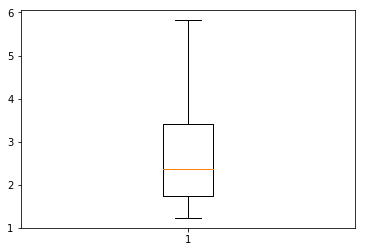

In [21]:
plt.boxplot(country_data.total_fer)

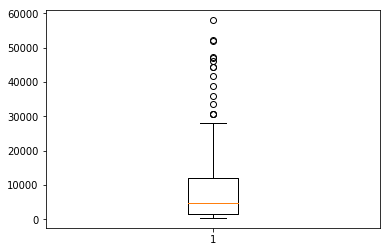

In [22]:
plt.boxplot(country_data.gdpp)
country_data=country_data[country_data.gdpp<=outlier_gdpp]

In [23]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,33.209091,37.069248,6.533471,43.567487,13798.826446,6.168496,71.182645,2.759091,9527.454545
std,30.705374,17.602717,2.223681,16.594957,11822.426202,5.467147,7.492626,1.279166,11762.636588
min,2.600000,0.109000,1.970000,0.065900,918.000000,-1.900000,52.000000,1.230000,413.000000
25%,10.200000,24.400000,5.070000,30.900000,4280.000000,1.740000,66.200000,1.720000,1480.000000
50%,19.700000,33.200000,6.030000,43.200000,9960.000000,4.440000,73.100000,2.410000,4660.000000
75%,52.500000,50.200000,7.970000,57.100000,19100.000000,8.980000,76.500000,3.500000,11900.000000
max,114.000000,77.600000,11.300000,80.200000,45400.000000,19.600000,82.800000,5.820000,47400.000000


#### We can see that now the country data is free of outliers and can be used for clustering
### Standardisation or Scaling of variables

In [24]:
# standardise all parameters
country_data_scale = country_data.drop("country", axis=1)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_data_scale = standard_scaler.fit_transform(country_data_scale)

C:\Users\saads\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\saads\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
country_data_scale
cols=country_data.columns[1:]
country_data_scale = pd.DataFrame(country_data_scale,columns=cols)
country_data_scale.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.863774,-1.544182,0.472586,0.080630,-1.035279,0.600881,-2.007967,2.402845,-0.766135
1,-0.543167,-0.517361,0.007464,0.304517,-0.328605,-0.308292,0.685825,-0.870648,-0.464187
2,-0.193245,0.075914,-1.067284,-0.736253,-0.076343,1.824132,0.712629,0.102765,-0.432601
3,-0.749196,0.480938,-0.227355,0.927768,0.450264,-0.868489,0.752835,-0.493843,0.228151
4,-0.494113,-0.928089,-0.963422,0.104834,-0.602951,0.294150,0.283767,-0.839247,-0.538458


### Model Building using PCA 

In [26]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [27]:
pca.fit(country_data_scale)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [28]:
pca.components_

array([[-0.4243013 ,  0.20247002,  0.26807297,  0.09654113,  0.40477403,
        -0.2245077 ,  0.41973242, -0.39651921,  0.38748222],
       [ 0.0045662 , -0.58168421,  0.10987774, -0.73242003,  0.16154606,
         0.15568835,  0.09253136, -0.00373662,  0.23280552],
       [ 0.1816148 , -0.31312418,  0.57015152,  0.16890594, -0.16476408,
        -0.64785161, -0.14681715,  0.19910768,  0.08549439],
       [ 0.33791797,  0.355659  ,  0.17151734,  0.00373517,  0.43807567,
         0.22140713, -0.26744937,  0.43891279,  0.4741107 ],
       [-0.13780048, -0.04864566,  0.69268699,  0.17695171, -0.15156998,
         0.62946578, -0.02382705, -0.09476033, -0.1968999 ],
       [ 0.06789197,  0.49413186,  0.22133364, -0.53076676, -0.07914605,
        -0.19742308, -0.41939839, -0.40227794, -0.19380385],
       [-0.05830872, -0.36449133, -0.16647101,  0.31474452,  0.20230701,
         0.07566207, -0.64951159, -0.46963726,  0.21884269],
       [ 0.7633989 , -0.00500615,  0.00612097,  0.09921323, -0

In [29]:
pca.explained_variance_ratio_

array([0.49159503, 0.17100115, 0.12765012, 0.09088565, 0.05778283,
       0.02619256, 0.01855674, 0.01097813, 0.0053578 ])

#### Plotting Pc1 against Pc2  to analyse them

In [30]:
colnames = list(country_data_scale.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.424301,0.004566,child_mort
1,0.202470,-0.581684,exports
2,0.268073,0.109878,health
3,0.096541,-0.732420,imports
4,0.404774,0.161546,income
5,-0.224508,0.155688,inflation
6,0.419732,0.092531,life_expec
7,-0.396519,-0.003737,total_fer
8,0.387482,0.232806,gdpp


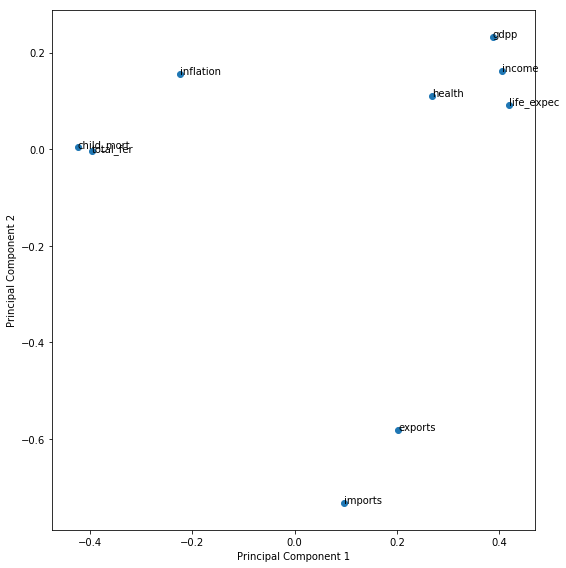

In [31]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### We can see that Principal Component 1 is higher where gdpp ,icome,life_expec is higher whereas Principal Component 2 is higher where gdpp,income,inflation is higher 

#### Using Scree plots for deciding the number of principal components required 

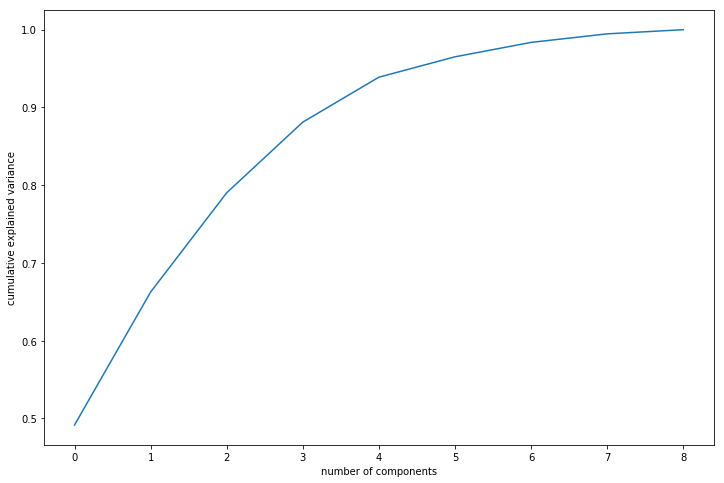

In [32]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### We can note that using only 5 components we can explain 93.8% of the variance . Therefore let's run PCA with only 5 principal components 

In [33]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [34]:
df_country_pca = pca_final.fit_transform(country_data_scale)
df_country_pca.shape
country_pca=pd.DataFrame(df_country_pca)
country_pca.rename(columns = {0: "PC1",1:"PC2",2:"PC3",3:"PC4",4:"PC5"},inplace = True)

#### Creating correlation matrix for the principal components

In [35]:
corrmat = np.corrcoef(country_pca.transpose())

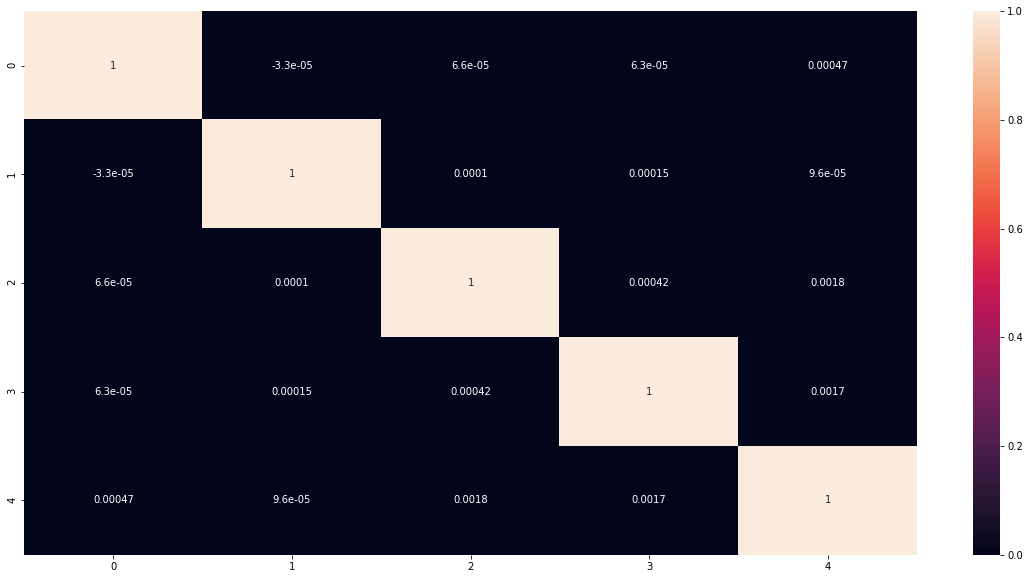

In [36]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

#### As expected we see little or no corelation between the principal components

### Finding the clustering tendency of dataset
#### Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

In [37]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [38]:
hopkins(country_pca)

0.7129158067760373

Value is **0.71** ,which means dataset can be divided into clusters

###  Clustering Using K means
#### Finding K value 
#### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of


In [39]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
sse_ = []
for k in range(2,12):
    kmeans = KMeans(n_clusters=k).fit(country_pca)
    sse_.append([k, silhouette_score(country_pca, kmeans.labels_)])
    silhouette_avg = silhouette_score(country_pca, kmeans.labels_)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.2972322839138845
For n_clusters = 3 The average silhouette_score is : 0.2892227225706083
For n_clusters = 4 The average silhouette_score is : 0.28262710517132933
For n_clusters = 5 The average silhouette_score is : 0.26739254596633094
For n_clusters = 6 The average silhouette_score is : 0.2543614106528779
For n_clusters = 7 The average silhouette_score is : 0.24821998253318825
For n_clusters = 8 The average silhouette_score is : 0.24181557743944504
For n_clusters = 9 The average silhouette_score is : 0.2335577490319349
For n_clusters = 10 The average silhouette_score is : 0.24624583926350957
For n_clusters = 11 The average silhouette_score is : 0.23819727535860882


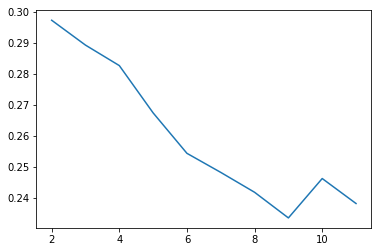

In [40]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#### Sum of Squared Distances

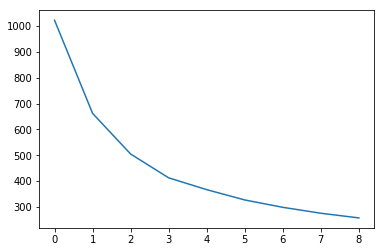

In [41]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

We can see that **2 Clusters** are the most optimal clustering mechanisms from silhouette method as well as elbow method  

#### Clustering using 2 clusters 

In [42]:
clus_model = KMeans(n_clusters = 2, max_iter=50)
clus_model.fit(country_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Hierarchical Clustering


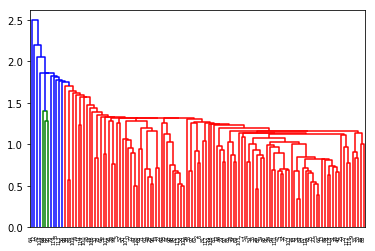

In [43]:
mergings = linkage(country_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

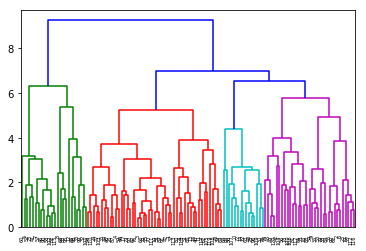

In [44]:
mergings = linkage(country_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [45]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 2).reshape(-1,))

#### Analysing the clusters formed 
* **Using K means**

In [46]:
country_data.index = pd.RangeIndex(len(country_data.index))
country_cluster_kmeans = pd.concat([country_data, pd.Series(clus_model.labels_)], axis=1)


In [47]:
country_cluster_kmeans.rename(columns = {0: "ClusterId"},inplace = True)

In [48]:
country_cluster_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
4,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0


#### Dividing the dataset into two based on clusterId

In [49]:
country_cluster_kmeans.groupby(by='ClusterId',axis=0).child_mort.mean()

ClusterId
0    13.605333
1    65.171739
Name: child_mort, dtype: float64

**Cluster 0** has higher child mortality rate

In [50]:
country_cluster_kmeans.groupby(by='ClusterId',axis=0).exports.mean()

ClusterId
0    42.189333
1    28.721283
Name: exports, dtype: float64

**Cluster 0** has lower export rate

In [51]:
country_cluster_kmeans.groupby(by='ClusterId',axis=0).health.mean()

ClusterId
0    7.156933
1    5.516957
Name: health, dtype: float64

**Cluster 0** has a lesser %age spent on health

In [52]:
country_cluster_kmeans.groupby(by='ClusterId',axis=0).imports.mean()

ClusterId
0    45.796000
1    39.934041
Name: imports, dtype: float64

**Cluster 0** has lower import rate

In [53]:
country_cluster_kmeans.groupby(by='ClusterId',axis=0).income.mean()

ClusterId
0    19596.40000
1     4346.26087
Name: income, dtype: float64

**Cluster 0** has low income per person

In [54]:
country_cluster_kmeans.groupby(by='ClusterId',axis=0).inflation.mean()

ClusterId
0    4.955773
1    8.145761
Name: inflation, dtype: float64

**Cluster 0** has higher inflation rate

In [55]:
country_cluster_kmeans.groupby(by='ClusterId',axis=0).life_expec.mean()

ClusterId
0    75.894667
1    63.500000
Name: life_expec, dtype: float64

**Cluster 0** has lower life expectancy rate

In [56]:
country_cluster_kmeans.groupby(by='ClusterId',axis=0).total_fer.mean()

ClusterId
0    1.969600
1    4.046304
Name: total_fer, dtype: float64

**Cluster 0** has a higher number of children per woman

In [57]:
country_cluster_kmeans.groupby(by='ClusterId',axis=0).gdpp.mean()

ClusterId
0    14174.400000
1     1950.913043
Name: gdpp, dtype: float64

**Cluster 0** has a lower gdpp

* **Using Hierarchical clustering** 

In [58]:
country_cluster_hc = pd.concat([country_data,clusterCut], axis=1)

In [59]:
country_cluster_hc.rename(columns={0:"ClusterId"},inplace=True)

#### Dividing the dataset into two based on clusterId

In [60]:
country_cluster_hc.groupby(by='ClusterId',axis=0).child_mort.mean()

ClusterId
0    39.753608
1     6.758333
Name: child_mort, dtype: float64

**Cluster 0** has higher child mortality rate

In [61]:
country_cluster_hc.groupby(by='ClusterId',axis=0).exports.mean()

ClusterId
0    34.677103
1    46.737500
Name: exports, dtype: float64

**Cluster 0** has lower export rate

In [62]:
country_cluster_hc.groupby(by='ClusterId',axis=0).health.mean()

ClusterId
0    6.093711
1    8.310833
Name: health, dtype: float64

**Cluster 0** has a lesser %age spent on health

In [63]:
country_cluster_hc.groupby(by='ClusterId',axis=0).imports.mean()

ClusterId
0    43.439855
1    44.083333
Name: imports, dtype: float64

**Cluster 0** has lower import rate

In [64]:
country_cluster_hc.groupby(by='ClusterId',axis=0).income.mean()

ClusterId
0     8879.979381
1    33679.166667
Name: income, dtype: float64

**Cluster 0** has low income per person

In [65]:
country_cluster_hc.groupby(by='ClusterId',axis=0).inflation.mean()

ClusterId
0    6.887670
1    3.261833
Name: inflation, dtype: float64

**Cluster 0** has higher inflation rate

In [66]:
country_cluster_hc.groupby(by='ClusterId',axis=0).life_expec.mean()

ClusterId
0    69.203093
1    79.183333
Name: life_expec, dtype: float64

**Cluster 0** has lower life expectancy rate

In [67]:
country_cluster_hc.groupby(by='ClusterId',axis=0).total_fer.mean()

ClusterId
0    2.974948
1    1.886667
Name: total_fer, dtype: float64

**Cluster 0** has a higher number of children per woman

In [68]:
country_cluster_hc.groupby(by='ClusterId',axis=0).gdpp.mean()

ClusterId
0     4559.195876
1    29607.500000
Name: gdpp, dtype: float64

**Cluster 0** has a lower gdpp

### Therefore it's evident that cluster 0 is the cluster of underdeveloped countries
### Clustering Visualization
#### PC1 Vs PC2  K Means

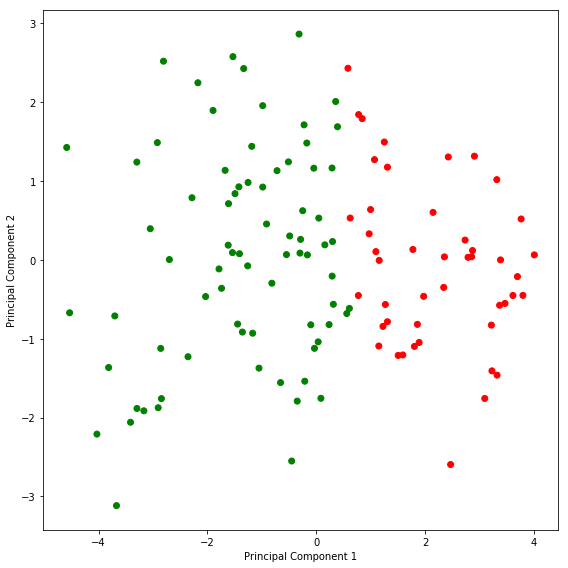

In [69]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_country_pca[:,0], df_country_pca[:,1], c = country_cluster_kmeans.ClusterId.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

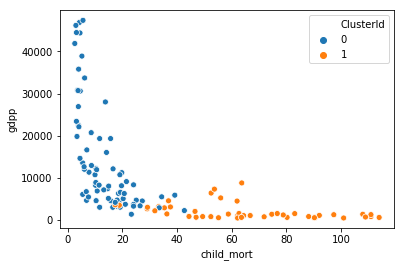

In [70]:
sns.scatterplot(x='child_mort',y="gdpp",data=country_cluster_kmeans,hue="ClusterId")

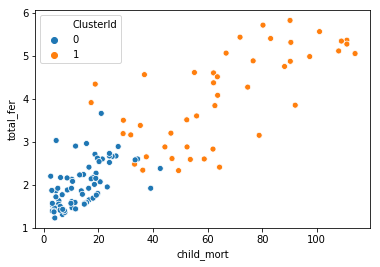

In [71]:
sns.scatterplot(x='child_mort',y="total_fer",data=country_cluster_kmeans,hue="ClusterId")

#### PC1 Vs PC2  Heirarchical Clustering

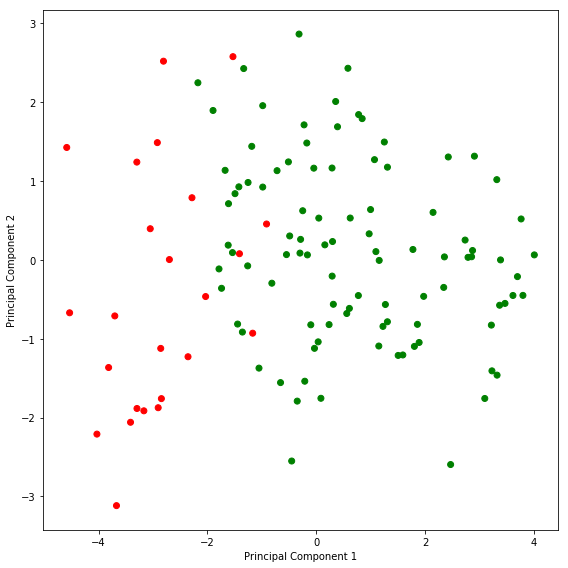

In [72]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_country_pca[:,0], df_country_pca[:,1], c = country_cluster_hc.ClusterId.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

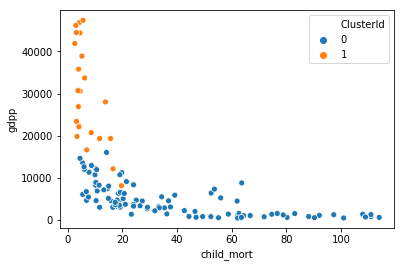

In [73]:
sns.scatterplot(x='child_mort',y="gdpp",data=country_cluster_hc,hue="ClusterId")

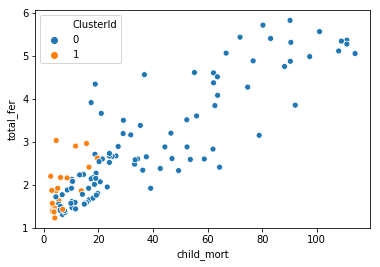

In [74]:
sns.scatterplot(x='child_mort',y="total_fer",data=country_cluster_hc,hue="ClusterId")

### We can see that the original variabless are also forming clusters as per the PCA clusters and clustering has been done correctly 

### Conclusion

#### Thus we conclude that cluster 0 has countries which are underdeveloped
To find the list of countries that need dire help 

In [75]:
country_underdeveloped=country_cluster_kmeans[country_cluster_kmeans.ClusterId==0]
country_underdeveloped.sort_values(by=['gdpp'],inplace=True)
country_underdeveloped=country_underdeveloped.head(20)

## Therefore the above countries are underdeveloped  and the following are the one's that need the direst help
* **Madagascar**	
* **Mozambique**	
* **Malawi**	
* **Eritrea**	
* **Togo**